# Project 1
### Problem statement
For this project you must create a data set by simulating a real-world phenomenon of
your choosing. You may pick any phenomenon you wish – you might pick one that is
of interest to you in your personal or professional life. Then, rather than collect data
related to the phenomenon, you should model and synthesise such data using Python.

I've decided to look at the stack overflow annual survey for 2023 results of which are available here https://survey.stackoverflow.co/2023/

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from zipfile import ZipFile
import io
from urllib.request import urlopen
import re
import random

Download Stack Overflow Annual survey 2023

In [44]:
r = urlopen('https://cdn.stackoverflow.co/files/jo7n4k8s/production/49915bfd46d0902c3564fd9a06b509d08a20488c.zip/stack-overflow-developer-survey-2023.zip').read()
file = ZipFile(io.BytesIO(r))
survey_df = pd.read_csv(file.open('survey_results_public.csv'))

#### Set up new DataFrame

create a new DataFrame with only the columns of interest https://www.statology.org/pandas-create-dataframe-from-existing-dataframe/

In [45]:
new_df = survey_df[['MainBranch','Age','RemoteWork','EdLevel','YearsCode','LanguageHaveWorkedWith','LanguageWantToWorkWith']].copy()

I am interested in only developers likely to be in the job market, so 25 to 64 year olds will be close enough. https://saturncloud.io/blog/how-to-remove-rows-with-specific-values-in-pandas-dataframe/

In [46]:
new_df.drop(new_df.loc[new_df['Age']=='18-24 years old'].index, inplace=True)
new_df.drop(new_df.loc[new_df['Age']=='Under 18 years old'].index, inplace=True)
new_df.drop(new_df.loc[new_df['Age']=='65 years or older'].index, inplace=True)
new_df.drop(new_df.loc[new_df['Age']=='Prefer not to say'].index, inplace=True)

I'm interested in python when it comes to languages so we'll create a column highlighting those who used Python in the past year
https://stackoverflow.com/questions/58360915/regex-expression-to-replace-a-string-containing-a-substring-with-the-substring-o

https://stackoverflow.com/questions/28986489/how-to-replace-text-in-a-string-column-of-a-pandas-dataframe

In [47]:

new_df["worked_with_python"] = new_df["LanguageHaveWorkedWith"]
# Next replace Python with y
new_df["worked_with_python"] = np.where(new_df["worked_with_python"].str.contains('Python'), 'Y',new_df["worked_with_python"])
# Remove all the other languages i.e. replace them with ''
chars_to_remove = ['Ada', 'Apex', 'APL', 'Assembly', 'Bash/Shell (all shells)', 'C', 'C#', 'C++', 'Clojure', 'Cobol', 'Crystal', 'Dart', 'Delphi', 
                   'Elixir', 'Erlang', 'F#', 'Flow', 'Fortran', 'GDScript', 'Go', 'Groovy', 'Haskell', 'HTML/CSS', 'Java', 'JavaScript', 'Julia', 
                   'Kotlin', 'Lisp', 'Lua', 'MATLAB', 'Nim', 'Objective-C', 'OCaml', 'Perl', 'PHP', 'PowerShell', 'Prolog', 'R', 'Raku', 'Ruby', 
                   'Rust', 'SAS', 'Scala', 'Solidity', 'SQL', 'Swift', 'TypeScript', 'VBA', 'Visual Basic (.Net)', 'Zig', ';']
regular_expression = '[' + re.escape (''. join (chars_to_remove)) + ']'
new_df["worked_with_python"] = new_df["worked_with_python"].str.replace(regular_expression, '', regex=True)
# Finally add an N to all the empty rows
new_df["worked_with_python"] = new_df["worked_with_python"].replace(r'^\s*$', 'N', regex=True)


Let's do the same for those who want to work with python in the future

In [48]:
new_df["want_to_python"] = new_df["LanguageWantToWorkWith"]
new_df["want_to_python"] = np.where(new_df["want_to_python"].str.contains('Python'), 'Y',new_df["want_to_python"])
chars_to_remove = ['Ada', 'Apex', 'APL', 'Assembly', 'Bash/Shell (all shells)', 'C', 'C#', 'C++', 'Clojure', 'Cobol', 'Crystal', 'Dart', 'Delphi', 
                   'Elixir', 'Erlang', 'F#', 'Flow', 'Fortran', 'GDScript', 'Go', 'Groovy', 'Haskell', 'HTML/CSS', 'Java', 'JavaScript', 'Julia', 
                   'Kotlin', 'Lisp', 'Lua', 'MATLAB', 'Nim', 'Objective-C', 'OCaml', 'Perl', 'PHP', 'PowerShell', 'Prolog', 'R', 'Raku', 'Ruby', 
                   'Rust', 'SAS', 'Scala', 'Solidity', 'SQL', 'Swift', 'TypeScript', 'VBA', 'Visual Basic (.Net)', 'Zig', ';']
regular_expression = '[' + re.escape (''. join (chars_to_remove)) + ']'
new_df["want_to_python"] = new_df["want_to_python"].str.replace(regular_expression, '', regex=True)
new_df["want_to_python"] = new_df["want_to_python"].replace(r'^\s*$', 'N', regex=True)

let's drop the old language columns

In [49]:
new_df = new_df.drop(['LanguageHaveWorkedWith', 'LanguageWantToWorkWith'], axis = 1 )

#### Python columns

Examine and synthesise data for the Worked With Python and Want To Work With Python columns


count Ns and Ys https://stackoverflow.com/questions/22391433/count-the-frequency-that-a-value-occurs-in-a-dataframe-column

In [50]:
worked_with_count = new_df['worked_with_python'].value_counts()

create a list with 0s and 1s representing Ns and Ys https://numpy.org/doc/stable/reference/random/generated/numpy.random.binomial.html
In this code 0.4545 is the probability of success and gives us a weighting towards 0

In [51]:
bn_list = np.random.binomial(1, 0.4544, size = 65505)

Create a new DataFrame and add the synthesised data to it.

In [52]:
test_df = pd.DataFrame({'test': bn_list})

count 0s and 1s

In [53]:
synt_count =test_df['test'].value_counts()

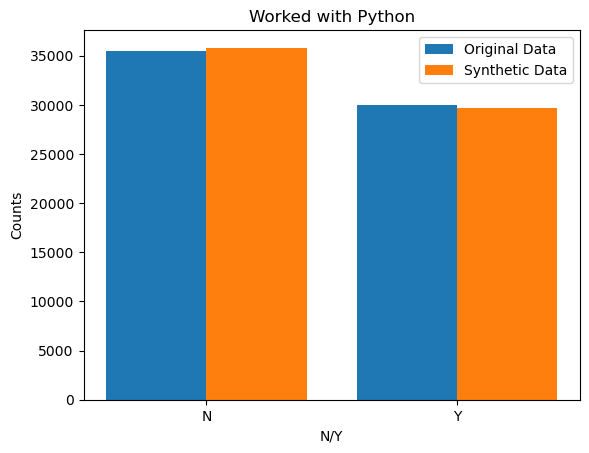

In [54]:
X = ['N','Y'] 
  
X_axis = np.arange(len(X)) 
  
plt.bar(X_axis - 0.2, worked_with_count, 0.4, label = 'Original Data') 
plt.bar(X_axis + 0.2, synt_count, 0.4, label = 'Synthetic Data') 
  
plt.xticks(X_axis, X) 
plt.xlabel('N/Y') 
plt.ylabel('Counts') 
plt.title('Worked with Python') 
plt.legend() 
plt.show() 

Repeat the above steps for 'want_to_python'

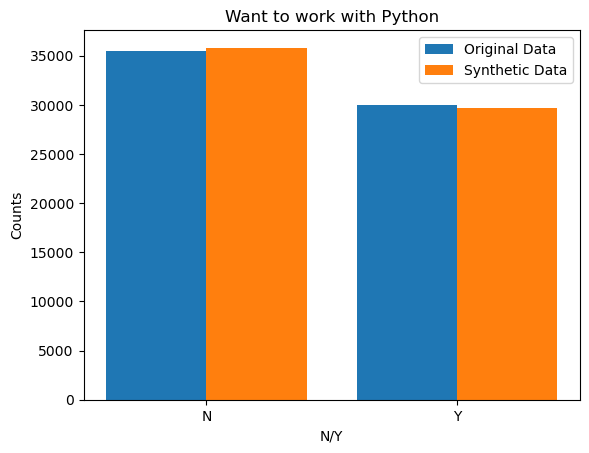

In [55]:
want_to_count = new_df['want_to_python'].value_counts()
bn_list_wt = np.random.binomial(1, 0.457, size = 65505)
test_df['test1'] = pd.Series(bn_list_wt)
synt_count_wt = test_df['test1'].value_counts()

X = ['N','Y'] 
  
X_axis = np.arange(len(X)) 
  
plt.bar(X_axis - 0.2, worked_with_count, 0.4, label = 'Original Data') 
plt.bar(X_axis + 0.2, synt_count, 0.4, label = 'Synthetic Data') 
  
plt.xticks(X_axis, X) 
plt.xlabel('N/Y') 
plt.ylabel('Counts') 
plt.title('Want to work with Python') 
plt.legend() 
plt.show() 

Create a DataFrame for the synthesised data with both Python Columns containing 10,000 entries and 1s and 0s converted back to Ys and Ns

In [56]:
synt_list_ww = np.random.binomial(1, 0.4544, size = 10000)
synt_list_wt = np.random.binomial(1, 0.457, size = 10000)
synt_df = pd.DataFrame({'worked_with_python': synt_list_ww})
synt_df['want_to_python'] = pd.Series(synt_list_wt)

synt_df['worked_with_python'] = synt_df['worked_with_python'].apply(str)
synt_df['want_to_python'] = synt_df['want_to_python'].apply(str)

synt_df['worked_with_python'] = np.where(synt_df['worked_with_python'].str.contains('1'), 'Y',synt_df['worked_with_python'])
synt_df['worked_with_python'] = np.where(synt_df['worked_with_python'].str.contains('0'), 'N',synt_df['worked_with_python'])
synt_df['want_to_python'] = np.where(synt_df['want_to_python'].str.contains('1'), 'Y',synt_df['want_to_python'])
synt_df['want_to_python'] = np.where(synt_df['want_to_python'].str.contains('0'), 'N',synt_df['want_to_python'])

#### Age Column
Examine and synthesise data for the Age column

In [57]:
age_counts = new_df["Age"].value_counts()

Use random.choices to create a list of values between 1 and 4 as substitutes for each age group, the age counts will be used as weights to ensure the values match the original data.

In [58]:
age_ranges = []
for i in range(1,5):
        age_ranges.append(i)

synt_age_list = random.choices(age_ranges, weights=(33247, 20532, 8334, 3392), k=65505)

Plot synthetic data against the original data

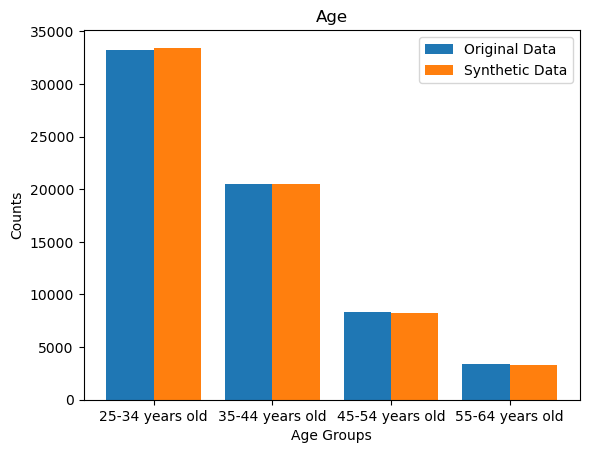

In [59]:
test_df['test2'] = pd.Series(synt_age_list)
synt_count_age = test_df['test2'].value_counts()

X = ['25-34 years old','35-44 years old', '45-54 years old', '55-64 years old'] 
  
X_axis = np.arange(len(X)) 
  
plt.bar(X_axis - 0.2, age_counts, 0.4, label = 'Original Data') 
plt.bar(X_axis + 0.2, synt_count_age, 0.4, label = 'Synthetic Data') 
  
plt.xticks(X_axis, X) 
plt.xlabel('Age Groups') 
plt.ylabel('Counts') 
plt.title('Age') 
plt.legend() 
plt.show() 


Add Age column to synt_df and replace the numbers with the proper age groups

In [60]:
age_ranges = []
for i in range(1,5):
        age_ranges.append(i)
synt_age_list = random.choices(age_ranges, weights=(33247, 20532, 8334, 3392), k=10000)

synt_df['Age'] = pd.Series(synt_age_list)

synt_df['Age'] = synt_df['Age'].apply(str)

# Using regular expressions as the previous method overwrites the entries 
# as they contain the numbers we want to replace
synt_df['Age'] = synt_df['Age'].replace(r'^1*$', '25-34 years old', regex=True)
synt_df['Age'] = synt_df['Age'].replace(r'^2*$', '35-44 years old', regex=True)
synt_df['Age'] = synt_df['Age'].replace(r'^3*$', '45-54 years old', regex=True)
synt_df['Age'] = synt_df['Age'].replace(r'^4*$', '55-64 years old', regex=True)

#### Years Coding Column
Examine and synthesise data for the Age column

Replace NA, Less than 1 year and More than 50 years with -1.0, 0.0 and 51.0 so we can convert all the entries to to numeric values to make counting and synthesis easier.

In [61]:
new_df["YearsCode"] = np.where(new_df["YearsCode"].str.contains('NA'), '-1.0', new_df["YearsCode"])
new_df["YearsCode"] = np.where(new_df["YearsCode"].str.contains('Less than 1 year'), '0.0', new_df["YearsCode"])
new_df["YearsCode"] = np.where(new_df["YearsCode"].str.contains('More than 50 years'), '51.0', new_df["YearsCode"])
new_df["YearsCode"] = pd.to_numeric(new_df["YearsCode"], errors='coerce')
years_count = new_df["YearsCode"].value_counts().rename_axis('unique_values').reset_index(name='counts')

years_count= years_count.sort_values(by=['unique_values'])

1        18.0
2        27.0
3        12.0
4         6.0
5        21.0
         ... 
89175    10.0
89177    17.0
89178    25.0
89179    20.0
89183    17.0
Name: YearsCode, Length: 65505, dtype: float64


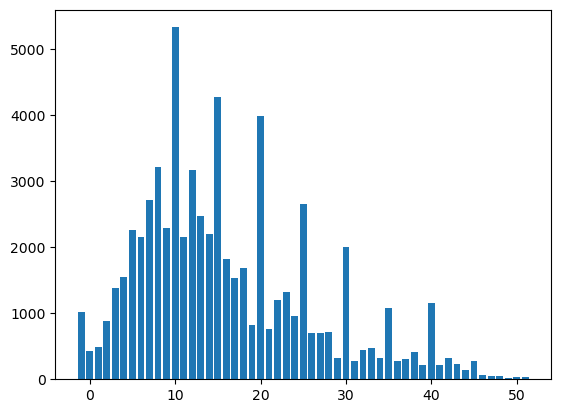

In [62]:
unique = years_count['unique_values']
count = years_count['counts']
plt.bar(unique, count)
plt.show()

### Research mental rounding errors in surveys
Over a decade ago, Dominitz and Manski (1997) observed that respondents tend to report values at one-percent intervals at the extremes (i.e., 0, 1, 2 and 98, 99, 100) and at five-percent intervals elsewhere (i.e., 5, 10, …, 90, 95), with responses more bunched at 50 percent than at adjacent round values (40, 45, 55, 60). This finding has been corroborated repeatedly in subsequent studies. It seems evident that respondents to subjective probability statements round their responses, but to what extent? When someone states “3 percent,” one might reasonably infer that the person is rounding to the nearest one percent. However, when someone states “30 percent,” one might well be uncertain whether the person is rounding to the nearest one, five, or ten percent. Even more uncertain is how to interpret responses of 0, 50, and 100 percent. In some cases, these may be sharp expressions of beliefs, rounded only to the nearest one or five percent. However, some respondents may engage in gross rounding, using 0 to express any relatively small chance of an event, 50 to represent any intermediate chance, and 100 for any relatively large chance. (Manski and Molinari, 2010)

Create synthetic data again using random.choices and plot it against the original data

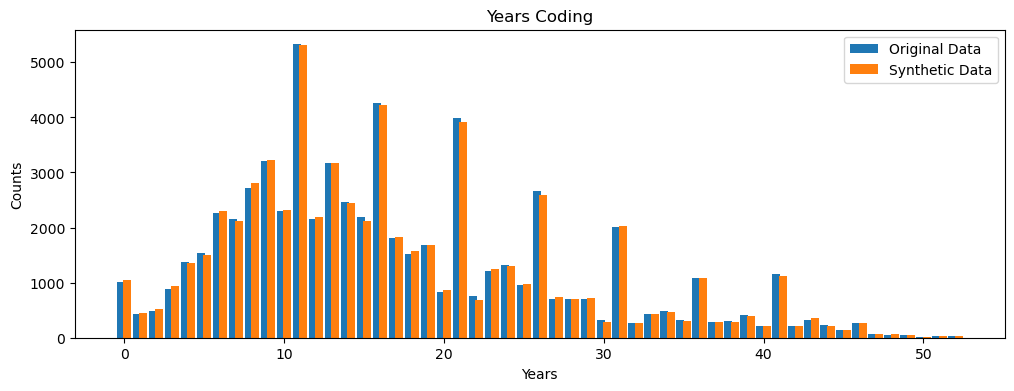

In [91]:
# Using the frequency of each number in the data as a weighting
weighting = years_count['counts'].tolist() 

import random
years_list = []
for i in range(-1,52):
        years_list.append(i)

y_count_list = random.choices(years_list, weights=(weighting), k=65505)

test_df['test3'] = pd.Series(y_count_list)
synt_count_years = test_df['test3'].value_counts()
synt_count_years = test_df['test3'].value_counts().rename_axis('unique_values').reset_index(name='counts')
synt_count_years = synt_count_years.sort_values(by=['unique_values'])

plt.figure(figsize=(12, 4))  
plt.bar(X_axis - 0.2, years_count['counts'], 0.5, label = 'Original Data') 
plt.bar(X_axis + 0.2, synt_count_years['counts'], 0.5, label = 'Synthetic Data') 
   
plt.xlabel('Years') 
plt.ylabel('Counts') 
plt.title('Years Coding') 
plt.legend() 
plt.show() 


Add years coding column to synt_df and convert the numbers back to strings and replace -1.0, 0.0 and 51.0 with NA, Less than 1 year and More than 50.

In [96]:
weighting = years_count['counts'].tolist() 

import random
years_list = []
for i in range(-1,52):
        years_list.append(i)

y_list = random.choices(years_list, weights=(weighting), k=10000)

synt_df['YearsCode'] = pd.Series(y_list)

synt_df['YearsCode'] = synt_df['YearsCode'].apply(str)

# Using regular expressions as the previous method overwrites the entries 
# as they contain the numbers we want to replace
synt_df['YearsCode'] = synt_df['YearsCode'].replace(r'^-1*$', 'NA', regex=True)
synt_df['YearsCode'] = synt_df['YearsCode'].replace(r'^0*$', 'Less than 1 year', regex=True)
synt_df['YearsCode'] = synt_df['YearsCode'].replace(r'^51*$', 'More than 50', regex=True)

#### Years Coding Column
Examine and synthesise data for the Age column

In [97]:
ed_count = new_df["EdLevel"].value_counts()
print(ed_count)

Bachelor’s degree (B.A., B.S., B.Eng., etc.)                                          28930
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                                       19005
Some college/university study without earning a degree                                 7713
Professional degree (JD, MD, Ph.D, Ed.D, etc.)                                         3524
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)     2479
Associate degree (A.A., A.S., etc.)                                                    2038
Something else                                                                          761
Primary/elementary school                                                               363
Name: EdLevel, dtype: int64


In [98]:
unique = 'l 8', 'l 9', 'some 3 l', 'l 10' , '2nd l', 'l 7', 'other', 'primary'


Create syntethic data

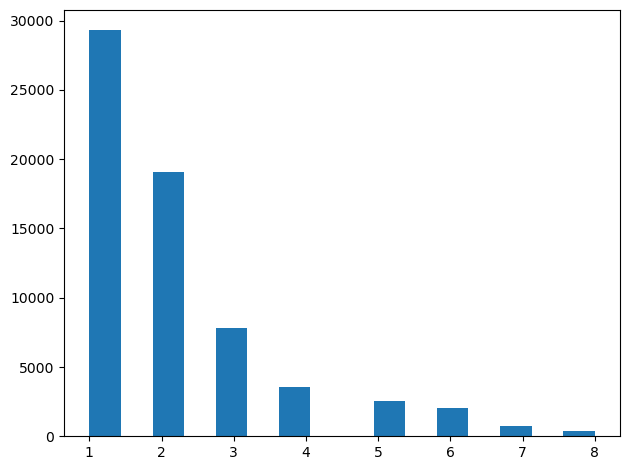

In [ ]:
import random
level_list = []
for i in range(1,9):
        level_list.append(i)

r_list = random.choices(level_list, weights=(28930, 19005, 7713, 3524, 2479, 2038, 761, 363), k=65505)



In [ ]:
#MainBranch
count2 = df["MainBranch"].value_counts()
print(count2)

I am a developer by profession                                                           55088
I am not primarily a developer, but I write code sometimes as part of my work/studies     5943
I used to be a developer by profession, but no longer am                                  1571
I am learning to code                                                                     1285
I code primarily as a hobby                                                                926
None of these                                                                              692
Name: MainBranch, dtype: int64


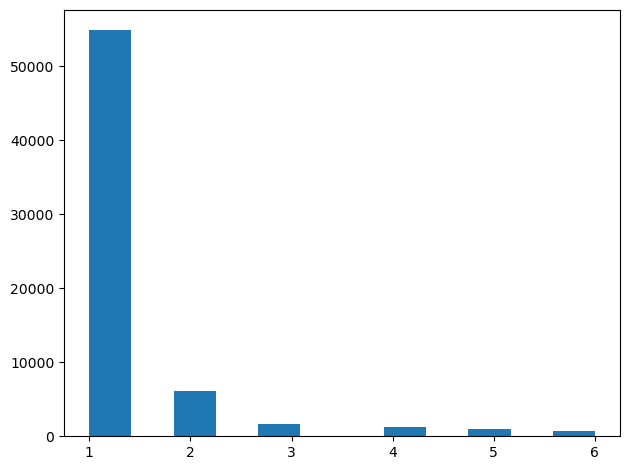

In [ ]:
s_list = []
for i in range(1,7):
        s_list.append(i)

r_list = random.choices(s_list, weights=(55088, 5943, 1571, 1285, 926, 692), k=65505)

plt.hist(r_list, bins = 12)
plt.tight_layout()
plt.show()

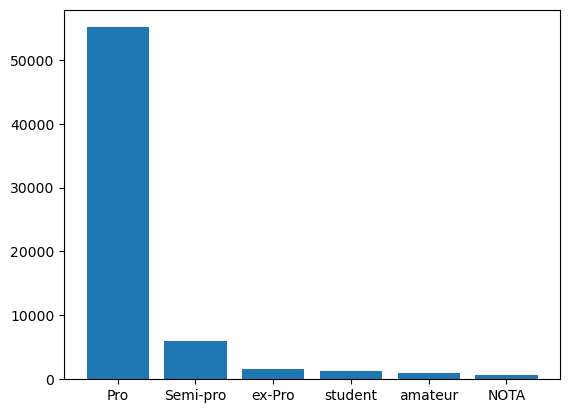

In [ ]:
unique = 'Pro', 'Semi-pro', 'ex-Pro', 'student' , 'amateur', 'NOTA'
# we can now put this into a Bar Chart
plt.bar(unique, count2)
plt.show()

In [ ]:
#RemoteWork
count2 = df["RemoteWork"].value_counts()
print(count2)

Remote                                  26362
Hybrid (some remote, some in-person)    26223
In-person                                8966
Name: RemoteWork, dtype: int64


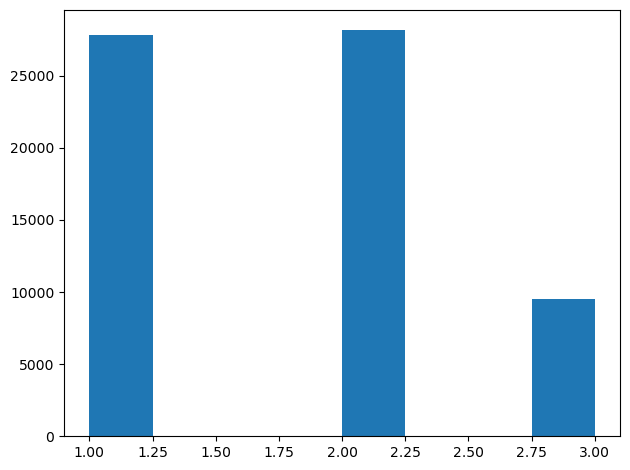

In [ ]:
s_list = []
for i in range(1,4):
        s_list.append(i)

r_list = random.choices(s_list, weights=(26362, 26223, 8966,), k=65505)

plt.hist(r_list, bins = 8)
plt.tight_layout()
plt.show()

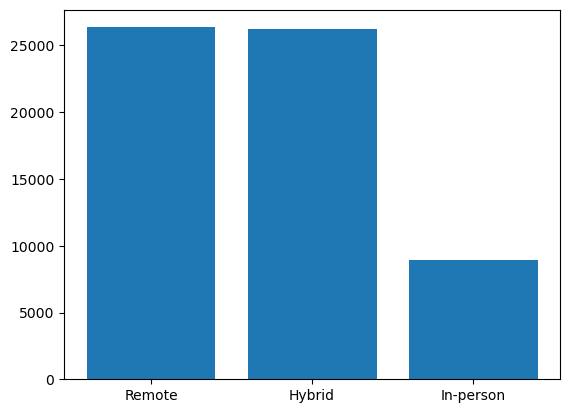

In [ ]:
unique = 'Remote', 'Hybrid', 'In-person'
# we can now put this into a Bar Chart
plt.bar(unique, count2)
plt.show()